### Loan Default Prediction 
The Purpose of this project is to use machine learning algorithm to predict loan default.  The data comes from Lending Club, a peer-to-peer lending institution.  The applicant's information at the time the loan is issued from such as FICO score and applicant's housing status is used to predict default.
Please visit https://loandefaultprediction.herokuapp.com/ for summary of results

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf   # for "formula notation"
from collections import Counter
import seaborn as sns
from sklearn import datasets, linear_model, utils, preprocessing, decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm
%matplotlib inline

from bokeh.plotting import figure, show, output_file, vplot

from bokeh.io import output_notebook

In [26]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
loandata07to11=pd.read_csv("LoanStats3a_securev1.csv")
loandata12to13=pd.read_csv("LoanStats3b_securev1.csv")
loandata13to14=pd.read_csv("LoanStats3c_securev1.csv")
loandata15=pd.read_csv("LoanStats3d_securev1.csv")

Explore the information available in the different data sets for different years

In [24]:
loandata07to11.columns[:].ravel()

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [25]:
testdata=loandata07to11[loandata07to11['loan_status']=='Current']

In [27]:
loandata12to13.columns[:]

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

### Reclassify loan status  to 1 or 0:  Loans that are charged off are considered as in "bad standing" or 0.  The rest are in "good standing" or 1

In [28]:
def loan_status_apply(x):
    if x=='Charged Off':
        status=0
        return status
    elif x=='Current':
        status=1
        return status
    elif x=='Does not meet the credit policy. Status:Charged Off':
        status=0
        return status
    elif x=='Does not meet the credit policy. Status:Current':
        status=1
        return status
    elif x=='Does not meet the credit policy. Status:Fully Paid':
        status=1
        return status
    elif x=='Fully Paid' or 'Fully Paid ':
        status=1
        return status

loandata07to11['loan_status_code'] = loandata07to11['loan_status'].apply(lambda x: loan_status_apply(x))
loandata12to13['loan_status_code'] = loandata12to13['loan_status'].apply(lambda x: loan_status_apply(x))
loandata13to14['loan_status_code'] = loandata13to14['loan_status'].apply(lambda x: loan_status_apply(x))

In [29]:
Counter(loandata07to11['loan_status'])

Counter({nan: 3,
         'Charged Off': 5565,
         'Current': 2080,
         'Default': 1,
         'Does not meet the credit policy. Status:Charged Off': 761,
         'Does not meet the credit policy. Status:Current': 4,
         'Does not meet the credit policy. Status:Fully Paid': 1984,
         'Fully Paid': 32036,
         'In Grace Period': 31,
         'Late (16-30 days)': 7,
         'Late (31-120 days)': 66})

In [30]:
Counter(loandata12to13['loan_status_code'])

Counter({0: 22636, 1: 165489})

In [31]:
Counter(loandata12to13['loan_status'])

Counter({nan: 2,
         'Charged Off': 22636,
         'Current': 66989,
         'Default': 96,
         'Fully Paid': 95007,
         'In Grace Period': 982,
         'Late (16-30 days)': 364,
         'Late (31-120 days)': 2049})

Explore the percentage of loans in bad standing vs. good standing

In [32]:
6326./(36212+6326)

0.14871409093046217

In [33]:
Counter(loandata12to13['loan_status_code'])

Counter({0: 22636, 1: 165489})

In [34]:
22636./(165489+22636)

0.12032425249169436

In [35]:
float(6326+22636)/(36212+6326+165489+22636)

0.1255597993609725

In [36]:
Counter(loandata13to14['loan_status_code'])

Counter({0: 13350, 1: 222281})

In [37]:
13350./(222281+13350)

0.05665638222474972

In [40]:
loandata12to13['issue_d'].head()

0    Dec-2013
1    Dec-2013
2    Dec-2013
3    Dec-2013
4    Dec-2013
Name: issue_d, dtype: object

In [41]:
loan_samples=pd.concat([loandata07to11,loandata12to13], ignore_index=True)

In [42]:
loan_samples.to_csv("loandata07to13.csv")

In [43]:
loan_samples.columns[:].ravel()

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [45]:
Counter(loan_samples['grade'])

Counter({nan: 5,
         'A': 38759,
         'B': 74994,
         'C': 58728,
         'D': 33897,
         'E': 15636,
         'F': 7007,
         'G': 1637})

In [46]:
loan_samples_a=loan_samples[loan_samples['grade']=='A']

In [47]:
loan_samples_b=loan_samples[loan_samples['grade']=='B']

In [48]:
loan_samples_c=loan_samples[loan_samples['grade']=='C']

In [49]:
loan_samples_d=loan_samples[loan_samples['grade']=='D']

In [50]:
loan_samples_e=loan_samples[loan_samples['grade']=='E']

In [51]:
loan_samples_f=loan_samples[loan_samples['grade']=='F']

In [52]:
loan_samples_g=loan_samples[loan_samples['grade']=='G']

Explore the statistics of different loan grades

In [53]:
loan_samples_a['emp_code'].mean()

6.778256305348443

In [54]:
loan_samples_b['emp_code'].mean()

6.8658568787958805

In [55]:
loan_samples_c['emp_code'].mean()

6.942623822008078

In [56]:
loan_samples_d['emp_code'].mean()

6.788980682411474

In [57]:
loan_samples_e['emp_code'].mean()

6.937838551988373

In [58]:
loan_samples_f['emp_code'].mean()

7.104374633000587

In [59]:
loan_samples_g['emp_code'].mean()

6.919475655430712

In [60]:
loan_samples_a['dti'].mean()

14.015918109342385

In [61]:
loan_samples_b['dti'].mean()

16.23290236552272

In [62]:
loan_samples_c['dti'].mean()

17.15343124233752

In [63]:
loan_samples_d['dti'].mean()

17.209808242617328

In [64]:
loan_samples_e['dti'].mean()

17.459171143514926

In [65]:
loan_samples_f['dti'].mean()

17.805390323961777

In [66]:
loan_samples_g['dti'].mean()

17.614208918753796

In [67]:
loan_samples_a['fico_range_high'].mean()

743.766093036456

In [68]:
loan_samples_b['fico_range_high'].mean()

706.434848121183

In [69]:
loan_samples_c['fico_range_high'].mean()

693.2408561503883

In [70]:
loan_samples_d['fico_range_high'].mean()

685.7896864029265

In [71]:
loan_samples_e['fico_range_high'].mean()

684.2849194167306

In [72]:
loan_samples_f['fico_range_high'].mean()

680.5284715284715

In [73]:
loan_samples_g['fico_range_high'].mean()

675.6249236408064

In [74]:
loan_samples_a['annual_inc'].mean()

78046.2643400852

In [75]:
loan_samples_b['annual_inc'].mean()

69687.67370549653

In [76]:
loan_samples_c['annual_inc'].mean()

68615.83004393142

In [77]:
loan_samples_d['annual_inc'].mean()

68562.17388087441

In [78]:
loan_samples_e['annual_inc'].mean()

77244.49576745971

In [79]:
loan_samples_f['annual_inc'].mean()

80357.39447409728

In [80]:
loan_samples_g['annual_inc'].mean()

94555.622516799

In [81]:
loansubset=loan_samples[['loan_amnt', 'funded_amnt', 'emp_length', 'home_ownership', 'annual_inc', 'purpose','earliest_cr_line',\
                          'open_acc', 'total_acc','dti','fico_range_low','fico_range_high','loan_status']]

In [82]:
def emp_apply(x):
    if x=='< 1 year':
        status=1
        return status
    elif x=='1 year':
        status=2
        return status
    elif x=='2 years':
        status=3
        return status
    elif x=='3 years':
        status=4
        return status
    elif x=='4 years':
        status=5
        return status
    elif x=='5 years':
        status=6
        return status
    elif x=='6 years':
        status=7
        return status
    elif x=='7 years':
        status=8
        return status
    elif x=='8 years':
        status=9
        return status
    elif x=='9 years':
        status=10
        return status
    elif x=='10+ years':
        status=11
        return status
        
loansubset['emp_code'] = loansubset['emp_length'].apply(lambda x: emp_apply(x))        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:

loansubset['loan_status_code'] = loansubset['loan_status'].apply(lambda x: loan_status_apply(x))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
def rent_apply(x):
    if x=='RENT':
        status=1
    
    else: 
        status=0
    return status
loansubset['is_renter'] = loansubset['home_ownership'].apply(lambda x: rent_apply(x))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
loansubset.head()

,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,purpose,earliest_cr_line,open_acc,total_acc,dti,fico_range_low,fico_range_high,loan_status,emp_code,loan_status_code,is_renter
0,5000,5000,10+ years,RENT,24000,credit_card,Jan-1985,3,9,27.65,735,739,Fully Paid,11,1,1
1,2500,2500,< 1 year,RENT,30000,car,Apr-1999,3,4,1.00,740,744,Charged Off,1,0,1
2,2400,2400,10+ years,RENT,12252,small_business,Nov-2001,2,10,8.72,735,739,Fully Paid,11,1,1
3,10000,10000,10+ years,RENT,49200,other,Feb-1996,10,37,20.00,690,694,Fully Paid,11,1,1
4,3000,3000,1 year,RENT,80000,other,Jan-1996,15,38,17.94,695,699,Current,2,1,1


In [86]:
loan_purpose=pd.get_dummies(loansubset['purpose'])
loan_homeownership=pd.get_dummies(loansubset['home_ownership'])

In [87]:
loan_table_home_added=pd.concat([loansubset,loan_homeownership],axis=1)
loan_table_home_purpose_added=pd.concat([loan_table_home_added,loan_purpose],axis=1)

In [88]:
loan_table_home_purpose_added.head()

,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,purpose,earliest_cr_line,open_acc,total_acc,dti,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,5000,10+ years,RENT,24000,credit_card,Jan-1985,3,9,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,< 1 year,RENT,30000,car,Apr-1999,3,4,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,10+ years,RENT,12252,small_business,Nov-2001,2,10,8.72,...,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10+ years,RENT,49200,other,Feb-1996,10,37,20.00,...,0,0,0,0,0,1,0,0,0,0
4,3000,3000,1 year,RENT,80000,other,Jan-1996,15,38,17.94,...,0,0,0,0,0,1,0,0,0,0


In [89]:
loan_data_features=loan_table_home_purpose_added

Save a copy of the combined 2007-2013 data into one csv file

In [90]:
loan_data_features.to_csv('loandata07to13_selectfeat.csv')

### Reload data

In [40]:
del loan_data
del loan_data_original

In [103]:
loan_data=pd.read_csv('loandata07to13_selectfeat.csv')

In [104]:
loan_data.dropna(inplace=True)

In [105]:
loan_data.shape

(221640, 36)

In [106]:
loan_data_original=loan_data.copy()

In [107]:
y_data=loan_data_original['loan_status_code']

In [108]:
y_data.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status_code, dtype: int64

In [97]:
loan_data.columns[:].ravel()

array(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'emp_length',
       'home_ownership', 'annual_inc', 'purpose', 'earliest_cr_line',
       'open_acc', 'total_acc', 'dti', 'fico_range_low', 'fico_range_high',
       'loan_status', 'emp_code', 'loan_status_code', 'is_renter',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'], dtype=object)

In [98]:
loan_data['loan_status_code'].head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status_code, dtype: int64

In [99]:
loan_data.head()

,Unnamed: 0,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,purpose,earliest_cr_line,open_acc,total_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,5000,5000,10+ years,RENT,24000,credit_card,Jan-1985,3,9,...,0,0,0,0,0,0,0,0,0,0
1,1,2500,2500,< 1 year,RENT,30000,car,Apr-1999,3,4,...,0,0,0,0,0,0,0,0,0,0
2,2,2400,2400,10+ years,RENT,12252,small_business,Nov-2001,2,10,...,0,0,0,0,0,0,0,1,0,0
3,3,10000,10000,10+ years,RENT,49200,other,Feb-1996,10,37,...,0,0,0,0,0,1,0,0,0,0
4,4,3000,3000,1 year,RENT,80000,other,Jan-1996,15,38,...,0,0,0,0,0,1,0,0,0,0


In [101]:
loan_data.drop(['Unnamed: 0','loan_status_code','loan_status'],axis=1,inplace=True)

In [102]:
loan_data.drop(['NONE'],axis=1,inplace=True)

In [15]:
loan_data.drop(['funded_amnt'],axis=1,inplace=True)

In [16]:
loan_data.columns[:].ravel()

array(['loan_amnt', 'emp_length', 'home_ownership', 'annual_inc',
       'purpose', 'earliest_cr_line', 'open_acc', 'total_acc', 'dti',
       'fico_range_low', 'fico_range_high', 'emp_code', 'is_renter',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'], dtype=object)

In [17]:
loan_data.drop(['emp_length','home_ownership'],axis=1,inplace=True)

In [18]:
loan_data.drop(['purpose','earliest_cr_line'],axis=1,inplace=True)

In [19]:
loan_data.columns.ravel()

array(['loan_amnt', 'annual_inc', 'open_acc', 'total_acc', 'dti',
       'fico_range_low', 'fico_range_high', 'emp_code', 'is_renter',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'], dtype=object)

In [20]:
loan_data.head()

,loan_amnt,annual_inc,open_acc,total_acc,dti,fico_range_low,fico_range_high,emp_code,is_renter,MORTGAGE,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,24000,3,9,27.65,735,739,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2500,30000,3,4,1.00,740,744,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2400,12252,2,10,8.72,735,739,11,1,0,...,0,0,0,0,0,0,0,1,0,0
3,10000,49200,10,37,20.00,690,694,11,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3000,80000,15,38,17.94,695,699,2,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
loan_data.columns[:].ravel()

array(['loan_amnt', 'annual_inc', 'open_acc', 'total_acc', 'dti',
       'fico_range_low', 'fico_range_high', 'emp_code', 'is_renter',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'], dtype=object)

In [22]:
X_data=loan_data

In [23]:
X_data.head()

,loan_amnt,annual_inc,open_acc,total_acc,dti,fico_range_low,fico_range_high,emp_code,is_renter,MORTGAGE,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000,24000,3,9,27.65,735,739,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2500,30000,3,4,1.00,740,744,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2400,12252,2,10,8.72,735,739,11,1,0,...,0,0,0,0,0,0,0,1,0,0
3,10000,49200,10,37,20.00,690,694,11,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3000,80000,15,38,17.94,695,699,2,1,0,...,0,0,0,0,0,1,0,0,0,0


### Build pipeline with StandardScaler, PCA and Random Forest to predict whether loan would be in good standing or not based on features

In [25]:
pipe3 = make_pipeline(StandardScaler(), # scale the features 
                    PCA(), # pca
                    RandomForestClassifier()) 

In [26]:
params3 = dict(pca__n_components=[5, 8, 10,  15], # 
                  randomforestclassifier__n_estimators=[10, 20, 30], # estimator params to grid search
                  randomforestclassifier__class_weight=['auto']    
              )

In [27]:
gs = GridSearchCV(pipe3, params3, cv=StratifiedKFold(y_data, n_folds=3), n_jobs=-1)
gs.fit(X_data, y_data)
best = (gs.best_estimator_, gs.best_score_)
print params3
print "Best Params:", gs.best_params_
print "Best Score:", gs.best_score_
print

{'randomforestclassifier__class_weight': ['auto'], 'pca__n_components': [5, 8, 10, 15], 'randomforestclassifier__n_estimators': [10, 20, 30]}
Best Params: {'randomforestclassifier__class_weight': 'auto', 'pca__n_components': 8, 'randomforestclassifier__n_estimators': 30}
Best Score: 0.873438909944



In [66]:
pca_component=PCA(n_components=8)
rfclassifier=RandomForestClassifier(n_estimators=30, class_weight='auto') # estimator
pca_rfc=make_pipeline(pca_component, rfclassifier)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42) 
pca_rfc.fit(X_train, y_train)
y_pred = pca_rfc.predict(X_test)
pca_rfc.score(X_test,y_test)

0.87531103880123595

In [68]:
confusion_matrix(y_test, y_pred)

array([[   15,  9071],
       [   49, 64007]])

In [69]:
Counter(y_test)

Counter({0: 9086, 1: 64056})

### The model is not very good at correctly identify the "bad loan" event.  It is important to find a model to optimize on recall as the number of bad loans is very small compared to overall sample

### Let's try to build pipeline using StandardScaler, PCA and Logistic Regression

In [28]:
pipe4 = make_pipeline(StandardScaler(), # scale the features 
                         PCA(), # pca
                         linear_model.LogisticRegression(class_weight='auto')) # estimator
params4 = dict(pca__n_components=[5, 8, 10, 15,20], # you probably have less features than these
              logisticregression__C=[0.01, 0.1, 1.0, 10.0], # estimator params to grid search
              logisticregression__penalty=['l1', 'l2'] # estimator params to grid search
                  )

In [29]:
gs = GridSearchCV(pipe4, params4, cv=StratifiedKFold(y_data, n_folds=3), n_jobs=-1)
gs.fit(X_data, y_data)
best = (gs.best_estimator_, gs.best_score_)
print params4
print "Best Params:", gs.best_params_
print "Best Score:", gs.best_score_
print

{'pca__n_components': [5, 8, 10, 15, 20], 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': [0.01, 0.1, 1.0, 10.0]}
Best Params: {'pca__n_components': 20, 'logisticregression__penalty': 'l2', 'logisticregression__C': 1.0}
Best Score: 0.560255369067



Compare the performance of having l1 or l2 norm penalty in logistic regression

In [75]:
logis_classifier=linear_model.LogisticRegression(class_weight='auto', C=1.0, penalty='l1')
#logis_classifier=linear_model.LogisticRegression( C=0.1, penalty='l2', class_weight={1: 9})

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=45) 
logis_classifier.fit(X_train, y_train)
y_pred = logis_classifier.predict(X_test)
logis_classifier.score(X_test,y_test)

0.57135435180881022

In [77]:
confusion_matrix(y_test, y_pred)

array([[ 5666,  3346],
       [28006, 36124]])

In [60]:
logis_classifier2=linear_model.LogisticRegression(C=0.1, penalty='l2', class_weight='auto')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=45) 
logis_classifier2.fit(X_train, y_train)
y_pred = logis_classifier2.predict(X_test)
logis_classifier2.score(X_test,y_test)

0.58164939432883977

In [62]:
confusion_matrix(y_test, y_pred)

array([[ 5444,  3568],
       [27031, 37099]])

### Make pipieline  with Standard scaler, PCA and  SVM to predict bad loans event

In [30]:
pipe12 = make_pipeline(StandardScaler(),
                    PCA(n_components=10),
                    RBFSampler(gamma=.2, random_state=1), 
                    LinearSVC(class_weight='auto')) 


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=47) 
pipe12.fit(X_train, y_train)
y_pred = pipe12.predict(X_test)
pipe12.score(X_test,y_test)

0.56452806352643925

In [32]:
confusion_matrix(y_test, y_pred)

array([[ 8296,  5499],
       [42760, 54265]])

### Build pipeline with StandardScaler, PCA and ExtraTreesClassifier for prediction

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
pipe13 = make_pipeline(StandardScaler(), # scale the features 
                    PCA(n_components=8), # pca
                    ExtraTreesClassifier(class_weight='auto', n_estimators=30)) # estimator

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=47) 
pipe13.fit(X_train, y_train)
y_pred = pipe13.predict(X_test)
pipe13.score(X_test,y_test)

0.86976177585273418

In [36]:
confusion_matrix(y_test, y_pred)

array([[  152, 13643],
       [  790, 96235]])

In [37]:
152./13643

0.011141244594297443

### Creating plots comparing loans in good standing and loans in bad standing

In [11]:

loandata12to13['loan_amnt'].sum()

2700420250.0

In [12]:
loandata13to14['loan_amnt'].sum()

3503840175.0

In [13]:
loandata12to13_bad=loandata12to13[loandata12to13['loan_status_code']==0]

In [14]:
loandata12to13_bad['loan_amnt'].sum()

334683050.0

In [15]:
loandata13to14_bad=loandata13to14[loandata13to14['loan_status_code']==0]

In [16]:
loandata13to14_bad['loan_amnt'].sum()

200700075.0

In [20]:
loan_samples=pd.concat([loandata12to13,loandata13to14], ignore_index=True)

In [21]:
loan_samples.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_credit_rv,inq_fi,total_fi_tl,inq_last_12m,loan_status_code
0,10159611,12011228,10000,10000,10000,36 months,9.67%,321.13,B,B1,...,NaN,NaN,NaN,NaN,NaN,22300,NaN,NaN,NaN,1
1,10148122,11999781,12000,12000,12000,36 months,7.62%,373.94,A,A3,...,NaN,NaN,NaN,NaN,NaN,23800,NaN,NaN,NaN,1
2,10127816,11979581,24000,24000,24000,36 months,13.53%,814.80,B,B5,...,NaN,NaN,NaN,NaN,NaN,28200,NaN,NaN,NaN,1
3,10179520,12031088,3000,3000,3000,36 months,12.85%,100.87,B,B4,...,NaN,NaN,NaN,NaN,NaN,5300,NaN,NaN,NaN,1
4,10119590,11971211,11500,11500,11500,60 months,22.90%,323.54,E,E4,...,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN,1


In [23]:
loansubset=loan_samples[['loan_amnt', 'funded_amnt', 'emp_length', 'home_ownership', 'annual_inc', 'purpose','earliest_cr_line',\
                          'open_acc', 'total_acc','dti','fico_range_low','fico_range_high','loan_status']]

In [30]:

loansubset['loan_status_code'] = loansubset['loan_status'].apply(lambda x: loan_status_apply(x))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
loansubset.shape

(423756, 15)

In [32]:
loansubset.head()

,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,purpose,earliest_cr_line,open_acc,total_acc,dti,fico_range_low,fico_range_high,loan_status,emp_code,loan_status_code
0,10000,10000,7 years,MORTGAGE,102000,debt_consolidation,Oct-1989,9,22,15.55,670,674,Current,8,1
1,12000,12000,3 years,MORTGAGE,96500,debt_consolidation,Sep-2003,17,30,12.61,705,709,Current,4,1
2,24000,24000,10+ years,MORTGAGE,100000,credit_card,Jan-1989,14,39,22.18,660,664,Current,11,1
3,3000,3000,10+ years,RENT,25000,debt_consolidation,May-1991,5,26,24.68,660,664,Fully Paid,11,1
4,11500,11500,4 years,RENT,32760,debt_consolidation,Mar-1999,12,17,27.06,675,679,Current,5,1


In [33]:
loan_goodstanding=loansubset[loansubset['loan_status_code']==1]

In [34]:
loan_goodstanding.reset_index()

,index,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,purpose,earliest_cr_line,open_acc,total_acc,dti,fico_range_low,fico_range_high,loan_status,emp_code,loan_status_code
0,0,10000,10000,7 years,MORTGAGE,102000,debt_consolidation,Oct-1989,9,22,15.55,670,674,Current,8,1
1,1,12000,12000,3 years,MORTGAGE,96500,debt_consolidation,Sep-2003,17,30,12.61,705,709,Current,4,1
2,2,24000,24000,10+ years,MORTGAGE,100000,credit_card,Jan-1989,14,39,22.18,660,664,Current,11,1
3,3,3000,3000,10+ years,RENT,25000,debt_consolidation,May-1991,5,26,24.68,660,664,Fully Paid,11,1
4,4,11500,11500,4 years,RENT,32760,debt_consolidation,Mar-1999,12,17,27.06,675,679,Current,5,1
5,5,11100,11100,10+ years,MORTGAGE,90000,other,Jun-2001,9,12,3.73,690,694,Current,11,1
6,6,9750,9750,1 year,RENT,26000,debt_consolidation,Jan-2007,12,28,25.12,670,674,Current,2,1
7,7,7550,7550,3 years,RENT,28000,debt_consolidation,Oct-2010,4,5,8.40,660,664,Current,4,1
8,8,4800,4800,2 years,MORTGAGE,39600,home_improvement,Aug-1995,3,8,2.49,755,759,Fully Paid,3,1
9,9,15000,15000,2 years,MORTGAGE,63000,debt_consolidation,Mar-1998,8,29,16.51,670,674,Current,3,1


In [35]:
loan_goodstanding.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
loan_goodstanding.shape

(369892, 15)

In [37]:
loan_badstanding=loansubset[loansubset['loan_status_code']==0]

In [38]:
loan_badstanding.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
loan_badstanding.shape

(33964, 15)

In [40]:
loan_badstanding.shape

(33964, 15)

In [41]:
#percentage of loans in bad standing
33964./(33964+387770)

0.08053417557038323

In [42]:
387770./(33964+387770)

0.9194658244296168

In [43]:
loan_goodstanding['loan_amnt'].head()

0    10000
1    12000
2    24000
3     3000
4    11500
Name: loan_amnt, dtype: float64

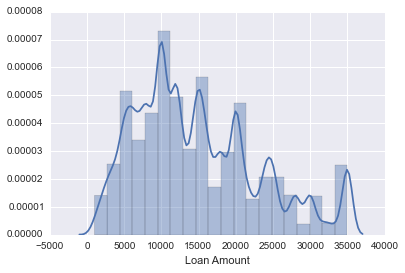

In [46]:
import seaborn as sns, numpy as np

ax = sns.distplot(loan_goodstanding['loan_amnt'], bins=20,norm_hist=True, axlabel="Loan Amount ($)")


(array([  1.18984115e-05,   2.50264986e-05,   4.70221065e-05,
          3.24911498e-05,   4.53074882e-05,   7.22391182e-05,
          4.71433421e-05,   2.91831489e-05,   5.48851033e-05,
          2.19090109e-05,   3.39286580e-05,   4.49957394e-05,
          1.44963179e-05,   2.00211989e-05,   2.19090109e-05,
          1.37862235e-05,   5.50756164e-06,   1.56740355e-05,
          4.34716343e-06,   2.64640069e-05]),
 array([  1000.,   2700.,   4400.,   6100.,   7800.,   9500.,  11200.,
         12900.,  14600.,  16300.,  18000.,  19700.,  21400.,  23100.,
         24800.,  26500.,  28200.,  29900.,  31600.,  33300.,  35000.]),
 <a list of 20 Patch objects>)

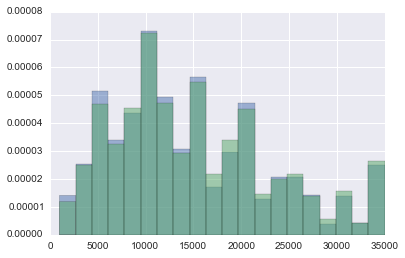

In [48]:
plt.hist(loan_goodstanding['loan_amnt'].values,bins=20,normed=1, alpha=0.5)
plt.hist(loan_badstanding['loan_amnt'].values,bins=20,normed=1, alpha=0.5)

(array([ 0.00394733,  0.00767372,  0.01402185,  0.01938315,  0.02639407,
         0.03397942,  0.0389725 ,  0.04199191,  0.04549737,  0.04624854,
         0.04490822,  0.04177097,  0.03682209,  0.03182901,  0.02723361,
         0.01715909,  0.01337378,  0.00636286,  0.00148761,  0.00119304]),
 array([  0.   ,   1.999,   3.998,   5.997,   7.996,   9.995,  11.994,
         13.993,  15.992,  17.991,  19.99 ,  21.989,  23.988,  25.987,
         27.986,  29.985,  31.984,  33.983,  35.982,  37.981,  39.98 ]),
 <a list of 20 Patch objects>)

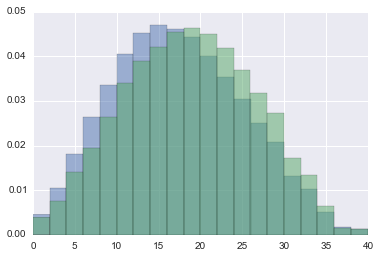

In [49]:
plt.hist(loan_goodstanding['dti'].values,bins=20,normed=1, alpha=0.5)
plt.hist(loan_badstanding['dti'].values,bins=20,normed=1, alpha=0.5)

(array([  2.27090544e-02,   2.18226003e-02,   1.89891131e-02,
          1.48607697e-02,   1.05804628e-02,   6.89851240e-03,
          4.42910457e-03,   1.53229922e-03,   1.92487175e-03,
          1.32018342e-03,   8.51629113e-04,   5.47701994e-04,
          3.83074805e-04,   2.78599858e-04,   1.10806762e-04,
          1.39299929e-04,   8.86454095e-05,   4.43227047e-05,
          6.33181496e-06,   9.49772245e-06]),
 array([ 664. ,  673.3,  682.6,  691.9,  701.2,  710.5,  719.8,  729.1,
         738.4,  747.7,  757. ,  766.3,  775.6,  784.9,  794.2,  803.5,
         812.8,  822.1,  831.4,  840.7,  850. ]),
 <a list of 20 Patch objects>)

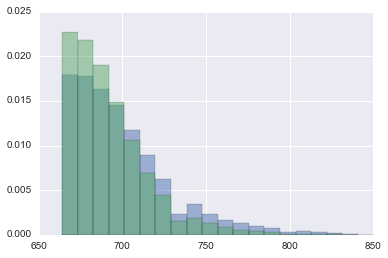

In [50]:
plt.hist(loan_goodstanding['fico_range_high'].values,bins=20,normed=1, alpha=0.5)
plt.hist(loan_badstanding['fico_range_high'].values,bins=20,normed=1, alpha=0.5)